In [1]:
import pandas as pd
import numpy as np
from  datetime import datetime 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [4]:
df.shape

(9, 4)

In [5]:
print(df.describe())

       temperature   humidity
count     9.000000   9.000000
mean     74.444444  57.000000
std       6.424778  22.841848
min      65.000000  26.000000
25%      68.000000  35.000000
50%      77.000000  58.000000
75%      79.000000  80.000000
max      82.000000  85.000000


In [6]:
77.000000 /  6.424778

11.984849904541448

In [7]:
z= 74.444444/ 6.424778 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         9 non-null      object
 1   city         9 non-null      object
 2   temperature  9 non-null      int64 
 3   humidity     9 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [9]:
df['date']=pd.to_datetime(df['date'])

C:\Users\MOHIT_PC\AppData\Local\Temp\ipykernel_20864\3344858798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[['temperature','humidity']])


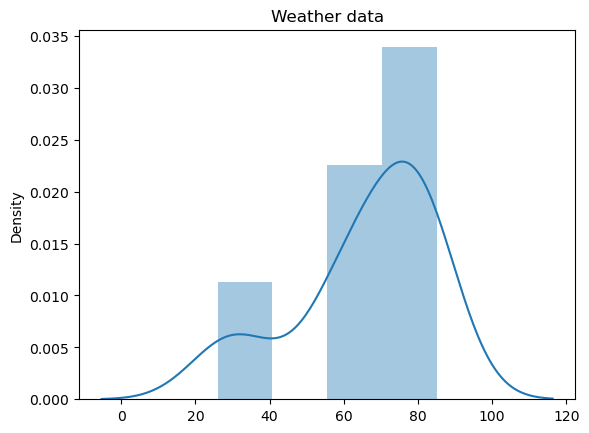

In [10]:
plt.title('Weather data')
sns.distplot(df[['temperature','humidity']])
plt.show()

In [11]:
df

,date,city,temperature,humidity
0,2017-05-01,new york,65,56
1,2017-05-02,new york,66,58
2,2017-05-03,new york,68,60
3,2017-05-01,mumbai,75,80
4,2017-05-02,mumbai,78,83
5,2017-05-03,mumbai,82,85
6,2017-05-01,beijing,80,26
7,2017-05-02,beijing,77,30
8,2017-05-03,beijing,79,35


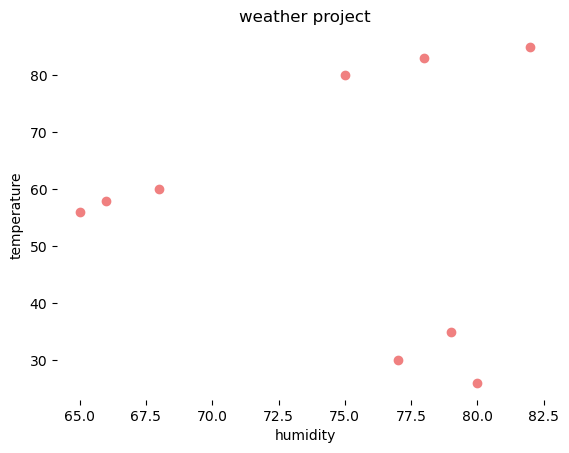

In [12]:
plt.scatter(df['temperature'], df['humidity'], color = 'lightcoral')
plt.title('weather project')
plt.xlabel('humidity')
plt.ylabel('temperature')
plt.box(False)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         9 non-null      datetime64[ns]
 1   city         9 non-null      object        
 2   temperature  9 non-null      int64         
 3   humidity     9 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 420.0+ bytes


In [14]:
df= df.drop('city',axis='columns')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         9 non-null      datetime64[ns]
 1   temperature  9 non-null      int64         
 2   humidity     9 non-null      int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 348.0 bytes


In [16]:
X = df['temperature'].values.reshape(-1, 1)
y = df['humidity'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred_test = regressor.predict(X_test)    
y_pred_train = regressor.predict(X_train)  

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
r2_score(y_test,y_pred_test)

-1.4330462761298315

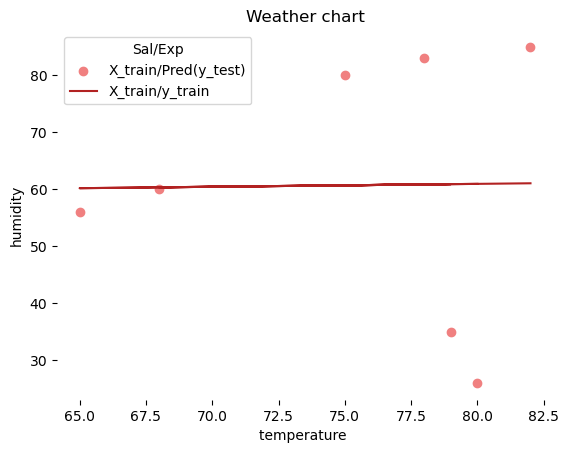

In [20]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Weather chart')
plt.xlabel('temperature ')
plt.ylabel('humidity')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

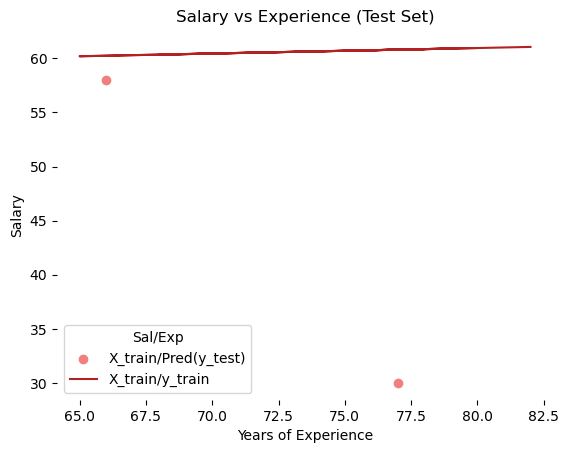

In [21]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [27]:
x = np.array([65,66,68,75,78,82,80,77,79])
y = np.array([56,58,60,80,83,85,26,30,35])

def calculate_coeff(X,y):
    n = np.size(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(y)
    
    # To calculate slope we need value 
    sumission_Xy = np.sum(y*X) - n*Y_mean*X_mean
    sumission_xx = np.sum(X*X) - n*X_mean*X_mean
    
    # finding slope 
    slope = sumission_Xy / sumission_xx
    intercept = Y_mean - slope*X_mean
    
    return slope,intercept
def predict(slope,X,intercept):
    return slope*X+intercept

slope,intercept = calculate_coeff(x,y)
print(f"Slope: {slope}, Intercept: {intercept}")

y_pred = predict(slope,x,intercept)
predict(x,y,intercept)

# this work is for r2 score 

y_pred1=[[59.40174966, 59.14131898, 58.88088829, 56.27658143, 55.8859354 ,
       55.62550471, 63.30820996, 62.78734859, 62.13627187]]

mean_of_actual = np.mean(y)

r2 = np.sum((y-mean_of_actual)**2)
lower_val = np.sum((y-y_pred1)**2)

summission = 1-(r2/lower_val)

print(summission)

Slope: -0.13021534320322856, Intercept: 66.693808882907
0.22391126652229454
